<a href="https://colab.research.google.com/github/catabia/indeed/blob/main/il_indeed_08_10_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import math
from matplotlib import dates

Chicago: https://www.44thward.org/wp-content/uploads/2018/04/Know_Chicagos_Minimum_Wage_Ordinance_2_.pdf

Cook County: https://www.hrsource.org/maimis/Members/Articles/2016/11/November_1/Cook_County_Passes_Minimum_Wage_Increase.aspx

IL: https://www.dol.gov/agencies/whd/state/minimum-wage/history


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hannah_research/data/indeed_il_08_03_21.txt", sep='\t')
df.shape

(90959, 47)

In [ ]:
#pandas!
pd.set_option('display.max_rows', 500) 

#dates!
df['review_date'] = pd.to_datetime(df['review_date'])
df.set_index(pd.DatetimeIndex(df['review_date']))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90959 entries, 0 to 90958
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   platform              90959 non-null  object        
 1   scrape_company_num    90959 non-null  int64         
 2   date_scraped          90959 non-null  object        
 3   scrape_folder_name    90959 non-null  object        
 4   scrape_file_name      90959 non-null  object        
 5   base_url              90959 non-null  object        
 6   page_num              90959 non-null  int64         
 7   parent_company        90959 non-null  object        
 8   be_careful            90959 non-null  int64         
 9   company_name          90959 non-null  object        
 10  scraped_from_url      90959 non-null  object        
 11  empid                 90959 non-null  object        
 12  language              0 non-null      float64       
 13  id              

Text(0.5, 1.0, 'Reviews in IL')

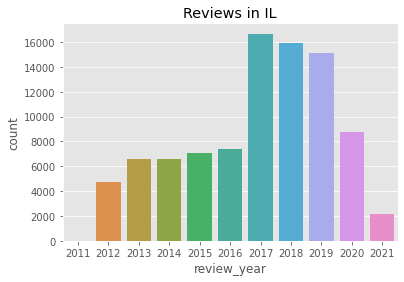

In [ ]:
sns.countplot(data=df, x='review_year')
plt.title("Reviews in IL")

In [ ]:

#df = df[df.be_careful!=1]

Text(0.5, 1.0, 'Reviews in OR')

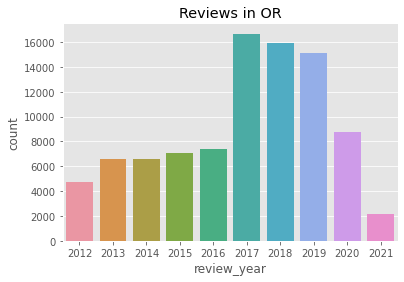

In [ ]:
# Cut off before 2012, after 2020

df = df[df.review_year>=2012]
#df = df[df.review_year<2021]
sns.countplot(data=df, x='review_year')
plt.title("Reviews in OR")

In [ ]:
# all cities and towns in Cook County, IL, except Chicago
cook = ['Berwyn',
'Blue Island',
'Burbank',
'Calumet City',
'Chicago Heights',
'Country Club Hills',
'Countryside',
'Des Plaines',
'Elgin',
'Evanston',
'Harvey',
'Hickory Hills',
'Hometown',
'Markham',
'Northlake',
'Oak Forest',
'Orland Park',
'Palos Heights',
'Palos Hills',
'Palos Park',
'Park Ridge',
'Prospect Heights',
'Rolling Meadows',
'Cicero',
'Thornton',
'Wheeling',
'Worth',
'Proviso',
'Maine',
'Schaumburg',
'Palatine',
'Lyons',
'Bremen',
'Niles',
'Hanover',
'Orland',
'Elk Grove',
'Leyden',
'Bloom',
'Northfield',
'Rich',
'Berwyn',
'New Trier',
'Palos',
'Oak Park',
'Stickney',
'Norwood Park',
'Lemont',
'Calumet',
'Barrington',
'Riverside',
'River Forest',
'Alsip',
'Arlington Heights',
'Barrington',
'Barrington Hills',
'Bedford Park',
'Bellwood',
'Berkeley',
'Bridgeview',
'Broadview',
'Brookfield',
'Burnham',
'Calumet Park',
'Chicago Ridge',
'Crestwood',
'Dixmoor',
'Dolton',
'East Hazel Crest',
'Elk Grove Village',
'Elmwood Park',
'Evergreen Park',
'Flossmoor',
'Ford Heights',
'Forest Park',
'Forest View',
'Franklin Park',
'Glencoe',
'Glenview',
'Glenwood',
'Golf',
'Harwood Heights',
'Hazel Crest',
'Hillside',
'Hinsdale',
'Hodgkins',
'Hoffman Estates',
'Homewood',
'Indian Head Park',
'Inverness',
'Justice',
'Kenilworth',
'La Grange',
'La Grange Park',
'Lansing',
'Lemont',
'Lincolnwood',
'Lynwood',
'Lyons',
'Matteson',
'Maywood',
'McCook',
'Melrose Park',
'Merrionette Park',
'Midlothian',
'Morton Grove',
'Mount Prospect',
'Niles',
'Norridge',
'North Riverside',
'Northbrook',
'Northfield',
'Oak Forest',
'Oak Lawn',
'Oak Park',
'Olympia Fields',
'Orland Hills',
'Orland Park',
'Palatine',
'Palos Park',
'Park Forest',
'Phoenix',
'Posen',
'Richton Park',
'River Forest',
'River Grove',
'Riverdale',
'Riverside',
'Robbins',
'Roselle',
'Rosemont',
'Sauk Village',
'Schaumburg',
'Schiller Park',
'Skokie',
'South Barrington',
'South Chicago Heights',
'South Holland',
'Steger',
'Stickney',
'Stone Park',
'Streamwood',
'Summit',
'Thornton',
'Tinley Park',
'University Park',
'Westchester',
'Western Springs',
'Wheeling',
'Willow Springs',
'Wilmette',
'Winnetka',
'Worth']

In [ ]:
# neighborhoods of Chicago: https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago
chicago = ['Chicago','Old Town Triangle', 'Fernwood', 'Wildwood', 'Wentworth Gardens', 'Jackowo', 'Clearing', 'Mount Greenwood', 
           'Tri-Taylor', 'Albany Park', 'Roseland', 'Belmont Terrace', 'South Lawndale', 'Parkview', 'Forest Glen', 
           'Roscoe Village', 'South Commons', 'Wicker Park', 'Cragin', 'Near North Side', 'Schorsch Village', 'Kensington', 
           'Buena Park', 'Austin, Humboldt Park', 'Big Oaks', 'Longwood Manor', 'Galewood', 'Lake Meadows', 
           'Wrightwood Neighbors', 'Chatham, Roseland', 'Old Irving Park', 'Near West Side', 'Lithuanian Plaza', 
           'Prairie Shores', 'Cabrini–Green', 'Canaryville', 'Margate Park', 'Lincoln Park', 'East Chatham', 
           'Greektown', 'Arcadia Terrace', 'Museum Campus', 'South Edgebrook', 'Belmont Cragin', 'Woodlawn', 'Lilydale', 
           'Chicago Lawn', 'Old Town', 'Morgan Park', 'Chrysler Village', 'Portage Park', 'Montclare', 'North Lawndale', 
           'Norwood Park', 'Smith Park', 'West Woodlawn', 'Wrightwood', 'West Morgan Park', 'Ravenswood', 'East Pilsen', 
           'Douglas', 'Old Norwood', 'The Gap', 'Bowmanville', 'The Island', 'Sheridan Park', 'Oakland', 'South Shore', 
           'Lakewood', 'Balmoral', 'West Loop', 'Garfield Ridge', 'Sleepy Hollow', 'Vittum Park', 'Grand Boulevard', 
           'Lake View', 'Humboldt Park', 'Ford City', 'Hanson Park', 'Back of the Yards', 'Douglas Park', 'Irving Park', 
           'Gold Coast', 'Kosciuszko Park', 'West Rogers Park', 'Hollywood Park', 'Logan Square', 'Park West', 'Bridgeport',
           'West Lawn', 'Little Village', 'Dearborn Homes', 'Grand Crossing', 'Pill Hill', 'Polish Downtown', "River's Edge",
           'Lakeview', 'Edgewater Glen', 'East Garfield Park', 'West Pullman', 'Magnificent Mile', 'LeClaire Courts', 
           'Eden Green', 'Near South Side', 'Washington Heights', 'West Chatham', 'Fuller Park', 'Edgewater', 'Washington Park', 
           'North Halsted', 'Gage Park', 'Ashburn', 'Golden Gate', 'McKinley Park', 'North Austin', 'Clearing West', 
           'Pullman', 'Belmont Gardens', 'Rogers Park', 'Gresham', 'Nortown', 'Lower West Side', 'East Beverly', 'Edgebrook', 
           'Englewood', 'Stony Island Park', 'Clarendon Park', 'North Center', 'Ravenswood Gardens', 'Ravenswood Manor', 
           'Andersonville', 'South Chicago', 'Graceland West', 'Hermosa', 'West Town', 'Hamilton Park', 'Archer Heights', 
           'South Loop', 'Greater Grand Crossing', 'Streeterville', 'Crestline', 'Ashburn Estates', 'New Chinatown', 
           'South Deering', 'Fulton River District', 'Dunning', 'Ranch Triangle', 'Old Edgebrook', 'University Village', 
           'Kenwood', 'Kilbourn Park', 'Marquette Park', 'Beverly View', 'Burnside', 'Marshall Square', 'Fifth City', 
           'Park Manor', 'Auburn Gresham', 'River North', 'Beverly Woods', 'Brickyard', 'K-Town', "Printer's Row", 
           'North Mayfair', 'Little Italy', 'Sheffield Neighbors', 'Homan Square', 'Austin', 'Uptown', 'East Hyde Park',
           'Chinatown', 'Irving Woods', 'Wacławowo', 'Cottage Grove Heights', 'Belmont Central', 'Riverdale', 'Bronzeville', 
           'Avalon Park', 'Goose Island', 'The Loop', 'Oriole Park', 'River West', "Talley's Corner", 'The Villa', 
           'East Side', "St. Ben's", 'Altgeld Gardens', 'West Englewood', 'Hegewisch', 'Pilsen', 'Avondale', 
           'North Kenwood', 'Bucktown', 'Jefferson Park', 'West Chesterfield', 'West Garfield Park', 'South East Ravenswood', 
           'Ukrainian Village', 'Prairie Avenue Historic District', 'Clearing East', 'Beverly', 'New Eastside', 
           'Princeton Park', 'Scottsdale', 'Stateway Gardens', 'Polish Village', 'Belmont Heights', 'Dearborn Park', 
           'Kelvyn Park', 'Noble Square', 'Pulaski Park', 'West Humboldt Park', 'Kennedy Park', 'Sauganash', 
           'Merchant Park', 'Armour Square', 'Calumet Heights', 'Norwood Park West', 'East Village', 
           'Avondale Gardens', 'Groveland Park', 'Hyde Park', 'Avondale, Irving Park', 'Brighton Park', 'West Beverly', 
           'North Park', 'South Austin', 'Mayfair', 'Rosemoor', 'New City', 'Edison Park', 'Illinois Medical District',
           'Wrigleyville', 'Sheridan Station Corridor', 'Legends South', 'Northalsted "Boystown"', 'West Town', 
           'Logan Square', 'Heart of Chicago', "O'Hare", 'Peterson Park', 'Brainerd', 'Jackson Park Highlands',
           'West Elsdon', 'Union Ridge', 'Chatham', 'Rosehill', 'Central Station', 'Marynook', 'Norwood Park East', 
           'West DePaul', 'Lakeview', 'Palmer Square', 'Gladstone Park', 'Schorsch Forest View', 'Edgewater Beach', 
           'West Ridge', 'Loyola', 'Lincoln Square', 'Budlong Woods']

In [ ]:
districts = cook + chicago

In [ ]:
#df[df.city=='Portland'].count()
df.count()

platform                90940
scrape_company_num      90940
date_scraped            90940
scrape_folder_name      90940
scrape_file_name        90940
base_url                90940
page_num                90940
parent_company          90940
be_careful              90940
company_name            90940
scraped_from_url        90940
empid                   90940
language                    0
id                      90940
review_url              90940
uid                     90940
review_date             90940
review_month            90940
review_day              90940
review_year             90940
parsable_loc            90940
state                   90940
city                    90938
country                 90940
location                90940
job_title               90931
norm_job_title          90480
current                 90940
length_of_employment        0
overall_rating          90940
work_life_rating        90940
compensation_rating     90940
job_security_rating     90940
management

In [ ]:
df['treat_loc'] = 0
df.loc[df.city.isin(districts),'treat_loc']= 1
df.treat_loc.sum()


37856

In [ ]:
df['month_year'] = pd.to_datetime(df['review_date']).dt.strftime('%Y-%m')

In [ ]:
df.review_date.min()

Timestamp('2012-01-01 00:00:00')

Total number of reviews: 90940
Total reviews in Portland: 37856


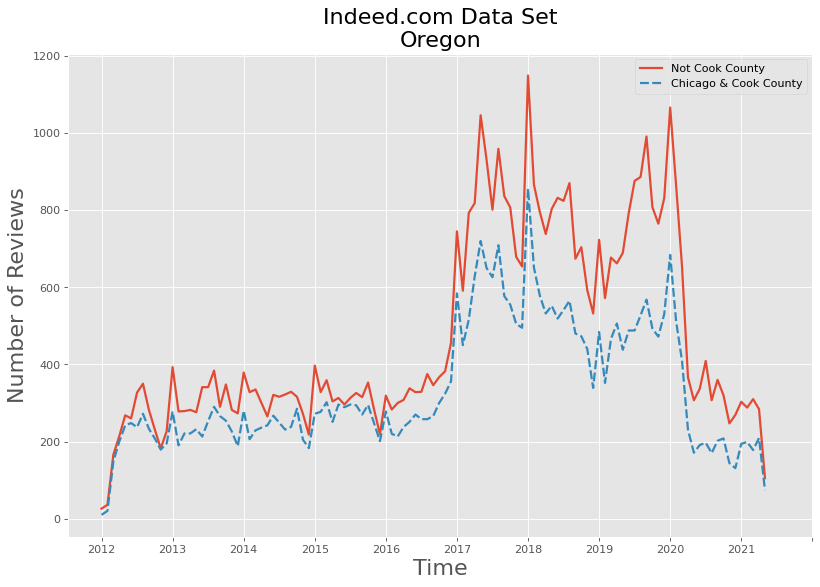

In [ ]:

print('Total number of reviews:', df.shape[0])
print('Total reviews in Portland:', df.treat_loc.sum())

data_viz = df[['month_year', 'treat_loc']]
data_viz = data_viz.groupby(['month_year', 'treat_loc']).size().reset_index(name='count')
#data_viz = data_viz.groupby(['review_year', 'seattle']).agg({'count'})

#print(data_viz)

figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=data_viz, x='month_year', y='count', hue = 'treat_loc', linewidth=2, style = 'treat_loc')
plt.title("Indeed.com Data Set\nOregon", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)
#ticks, labels = plt.xticks()

plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
plt.legend(['Not Cook County', 'Chicago & Cook County'])


30501


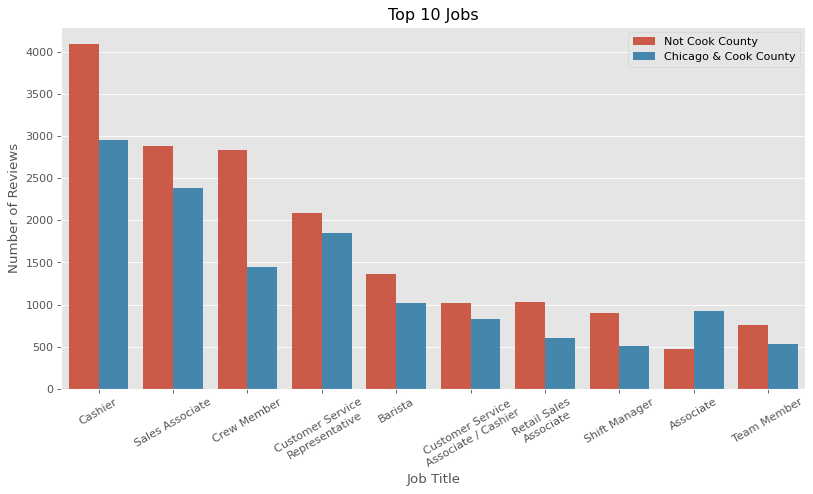

In [ ]:
figure(figsize=(12, 6), dpi=80)
top_jobs = df.norm_job_title.value_counts()[:10].index.tolist()
job_df = df[df.norm_job_title.isin(top_jobs)]
print(job_df.shape[0])
sns.countplot(data=job_df, x='norm_job_title', hue = 'treat_loc', order = top_jobs)
plt.title("Top 10 Jobs")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
l= ['Cashier', 'Sales Associate', 'Crew Member', 'Customer Service\nRepresentative', 'Barista', 'Customer Service\nAssociate / Cashier', 'Retail Sales\nAssociate', 'Shift Manager', 'Associate', 'Team Member']
plt.xticks(ticks=locs, labels=l, rotation=30)
plt.ylabel('Number of Reviews')
plt.legend(['Not Cook County', 'Chicago & Cook County'])

30501


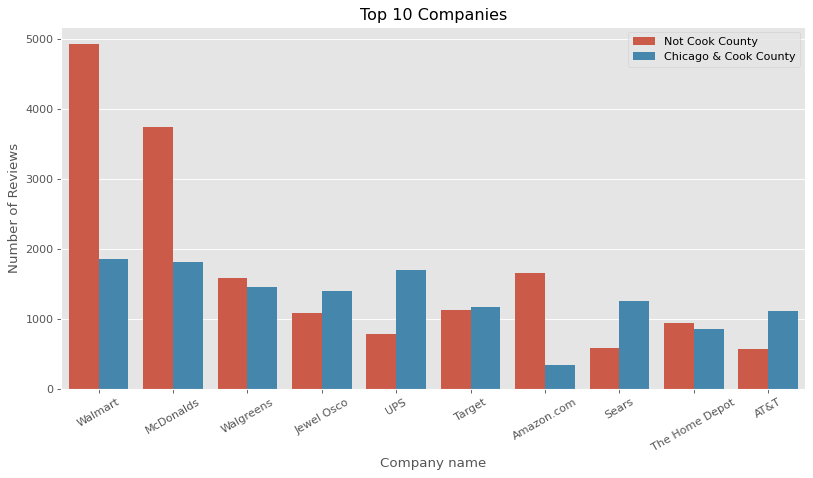

In [ ]:
figure(figsize=(12, 6), dpi=80)
top_comp = df.company_name.value_counts()[:10].index.tolist()
comp_df = df[df.company_name.isin(top_comp)]
print(job_df.shape[0])
sns.countplot(data=comp_df, x='company_name', hue = 'treat_loc', order = top_comp)
plt.title("Top 10 Companies")
plt.xlabel('Company name')
locs, labs = plt.xticks()
plt.xticks(rotation=30)
plt.ylabel('Number of Reviews')
plt.legend(['Not Cook County', 'Chicago & Cook County'])

In [ ]:
comp = df.groupby(['month_year', 'treat_loc']).agg({'overall_rating':['mean', 'count']})
comp.columns = ['mean', 'count']
comp.reset_index(inplace=True)
comp

,month_year,treat_loc,mean,count
0,2012-01,0,3.846154,26
1,2012-01,1,4.200000,10
2,2012-02,0,3.777778,36
3,2012-02,1,4.100000,20
4,2012-03,0,3.644578,166
5,2012-03,1,3.770270,148
6,2012-04,0,3.616822,214
7,2012-04,1,3.770000,200
8,2012-05,0,3.679104,268
9,2012-05,1,3.690083,242


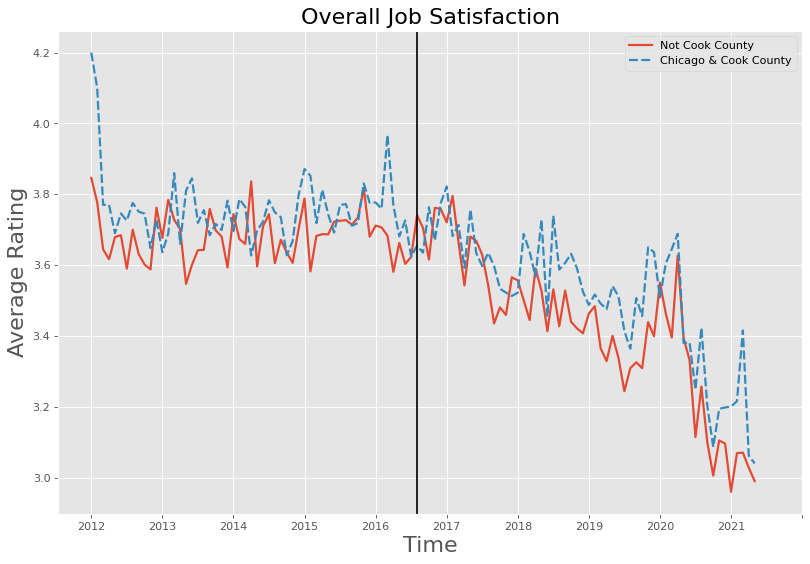

In [ ]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=comp, x='month_year', y='mean', hue = 'treat_loc', linewidth=2, style = 'treat_loc')
plt.title("Overall Job Satisfaction", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
#ticks, labels = plt.xticks()

plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
plt.legend(['Not Cook County', 'Chicago & Cook County'])
plt.axvline(x=55, color = 'black')

In [ ]:
f = df[df.company_name.isin(['Amazon.com', 'Walmart', 'McDonalds', 'Starbucks'])]
domp = f.groupby(['month_year', 'company_name']).agg({'overall_rating':['mean', 'count']})
domp.columns = ['mean', 'count']
domp.reset_index(inplace=True)
domp

,month_year,company_name,mean,count
0,2012-01,McDonalds,3.500000,4
1,2012-01,Walmart,3.750000,4
2,2012-02,McDonalds,3.750000,4
3,2012-02,Walmart,3.500000,2
4,2012-03,McDonalds,3.692308,13
5,2012-03,Walmart,3.457143,35
6,2012-04,McDonalds,3.666667,18
7,2012-04,Starbucks,4.333333,3
8,2012-04,Walmart,3.425000,40
9,2012-05,McDonalds,3.850000,20


([<matplotlib.axis.XTick at 0x7f2dafc08c90>,
 [Text(0, 0, '2012'),
  Text(0, 0, '2013'),
  Text(0, 0, '2014'),
  Text(0, 0, '2015'),
  Text(0, 0, '2016'),
  Text(0, 0, '2017'),
  Text(0, 0, '2018'),
  Text(0, 0, '2019'),
  Text(0, 0, '2020'),
  Text(0, 0, '2021')])

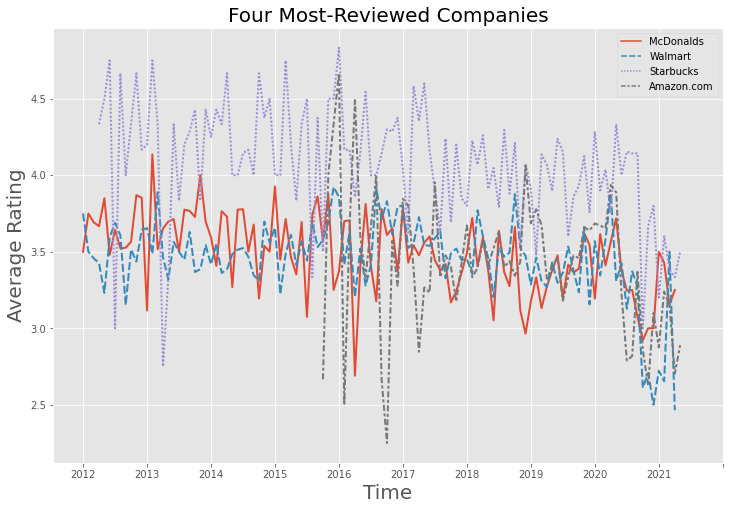

In [ ]:
### plt.clf()
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=domp, x='month_year', y='mean', hue='company_name',linewidth=2, style = 'company_name')
plt.title("Four Most-Reviewed Companies", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
plt.legend(title='')
#ticks, labels = plt.xticks()

plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
#plt.legend(['Not Seattle', 'Seattle'])

In [ ]:
df2 = df[df.compensation_rating!=0]
print(df2.shape[0])
comp = df2.groupby(['review_year', 'treat_loc']).agg({'compensation_rating':['mean', 'count']})
comp.columns = ['mean', 'count']
comp.reset_index(inplace=True)
comp

83241


,review_year,treat_loc,mean,count
0,2012,0,3.251912,2223
1,2012,1,3.415966,1904
2,2013,0,3.193748,3231
3,2013,1,3.357084,2414
4,2014,0,3.185638,3189
5,2014,1,3.330498,2469
6,2015,0,3.231957,3367
7,2015,1,3.397023,2889
8,2016,0,3.194714,3708
9,2016,1,3.400547,2926


(2.8, 3.8)

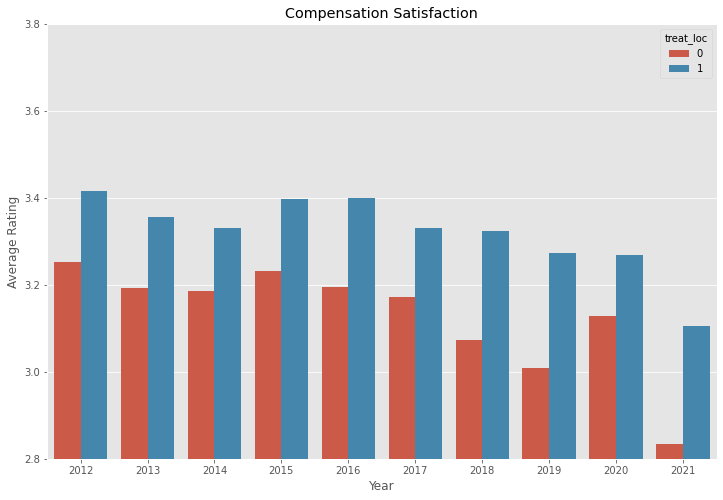

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=comp, x='review_year', y='mean', hue='treat_loc')


plt.title("Compensation Satisfaction")
plt.xlabel('Year')
plt.ylabel('Average Rating')
#plt.legend(['Not Seattle', 'Seattle'])
plt.ylim(2.8, 3.8)

In [ ]:
# create output for R
df['post'] = 0
# different treatment times for Chicago and Cook
mask = (df['review_date']>='07/01/2015') & (df.city.isin(chicago))
mask2 = (df['review_date']>='07/01/2017') & (df.city.isin(cook))

df.post[mask]=1
df.post[mask2]=1

print(df.treat_loc)

df['month_year'] = pd.to_datetime(df['review_date']).dt.to_period('M')

rdf = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating',
          'management_rating', 'culture_rating', 'post', 'treat_loc', 'review_year', 
          'company_name', 'norm_job_title', 'review_date', 'city', 'month_year']]
rdf.to_csv('/content/drive/MyDrive/hannah_research/data/il_rdf.csv', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        0
1        1
2        1
3        0
4        0
        ..
90954    1
90955    0
90956    0
90957    0
90958    1
Name: treat_loc, Length: 90940, dtype: int64
